In [20]:
import json
import os
import time 
import math 
import pickle

from tqdm import tqdm

import numpy as np
import torch 
import torch.nn.functional as F 

from model import GPTConfig, GPT

### Dataset Exploration

In [21]:
ROOT_DIR = "/raid/slee3473/LLM/SQuAD"
DATA_DIR = os.path.join(ROOT_DIR, "data")
OUT_DIR = os.path.join(ROOT_DIR, "out")

In [22]:
f = open(os.path.join(DATA_DIR, "train-v2.0.json"))
squad = json.load(f)

In [23]:
# print((data["data"][0]["title"]))
# print((squad["data"][0]["paragraphs"][0]["qas"][0]))
# print(len(squad["data"]))
# print(len(squad["data"][0]["paragraphs"]))
print((squad["data"][0]["paragraphs"][2]["context"]))
print()
print((squad["data"][0]["paragraphs"][1]["context"]))

A self-described "modern-day feminist", Beyoncé creates songs that are often characterized by themes of love, relationships, and monogamy, as well as female sexuality and empowerment. On stage, her dynamic, highly choreographed performances have led to critics hailing her as one of the best entertainers in contemporary popular music. Throughout a career spanning 19 years, she has sold over 118 million records as a solo artist, and a further 60 million with Destiny's Child, making her one of the best-selling music artists of all time. She has won 20 Grammy Awards and is the most nominated woman in the award's history. The Recording Industry Association of America recognized her as the Top Certified Artist in America during the 2000s decade. In 2009, Billboard named her the Top Radio Songs Artist of the Decade, the Top Female Artist of the 2000s and their Artist of the Millennium in 2011. Time listed her among the 100 most influential people in the world in 2013 and 2014. Forbes magazine

In [513]:
paragraphs = {squad["title"]: [p["context"] for p in squad["paragraphs"]] for squad in squad["data"]}

### Add new paragraph

In [514]:
paragraphs["Russian-Ukraine"] = [
    "On 24 February 2022, Russia invaded Ukraine in an escalation of the Russo-Ukrainian War that started in 2014. The invasion was the biggest attack on a European country since World War II. It is estimated to have caused tens of thousands of Ukrainian civilian casualties and hundreds of thousands of military casualties. By June 2022, Russian troops occupied about 20% of Ukrainian territory. About 8 million Ukrainians had been internally displaced and more than 8.2 million had fled the country by April 2023, creating Europe's largest refugee crisis since World War II. Extensive environmental damage caused by the war, widely described as an ecocide, contributed to food crises worldwide.",
    "Before the invasion, Russian troops massed near Ukraine's borders as Russian officials denied any plans to attack. Russian president Vladimir Putin announced a \"special military operation\" to support the Russian-backed breakaway republics of Donetsk and Luhansk, whose paramilitary forces had been fighting Ukraine in the Donbas conflict since 2014. Putin espoused irredentist views challenging Ukraine's right to exist, and falsely claimed that Ukraine was governed by neo-Nazis persecuting the Russian minority. He said his goal was to \"demilitarize\" and \"denazify\" Ukraine. Russian air strikes and a ground invasion launched at a northern front from Belarus towards Kyiv, a southern front from Crimea, and an eastern front from the Donbas and towards Kharkiv. Ukraine enacted martial law and ordered a general mobilization.",
    "Russian troops retreated from the northern front by April 2022 after encountering logistical challenges and stiff Ukrainian resistance. On the southern and southeastern fronts, Russia captured Kherson in March and Mariupol in May after a destructive siege. Russia launched a renewed offensive in the Donbas and continued to bomb military and civilian targets far from the front line, including the energy grid through the winter. In late 2022, Ukraine launched successful counteroffensives in the south and east. Soon after, Russia announced the illegal annexation of four partly-occupied regions. In November, Ukraine retook parts of Kherson Oblast, including the city of Kherson itself. In June 2023, Ukraine launched another counteroffensive in the southeast, which has progressed slowly and with heavy casualties.",
    "The invasion met international condemnation. The United Nations General Assembly passed a resolution condemning the invasion and demanding a full Russian withdrawal in March 2022. The International Court of Justice ordered Russia to suspend military operations and the Council of Europe expelled Russia. Many countries imposed sanctions on Russia and its ally Belarus, and provided humanitarian and military aid to Ukraine. Protests occurred around the world, along with mass arrests of anti-war protesters in Russia, which also enacted a law enabling greater media censorship. Over 1,000 companies closed their operations in Russia and Belarus as a result of the invasion. The International Criminal Court (ICC) opened investigations into possible crimes against humanity, war crimes, abduction of children, and genocide, issuing an arrest warrant for Putin in March 2023.",
    "Ukraine signed the Nuclear Non-Proliferation Treaty in 1994, agreeing, in return for security guarantees, to dismantle the nuclear weapons the USSR had left in Ukraine when it collapsed. Russia, the UK and the US agreed in the Budapest Memorandum to uphold Ukraine's territorial integrity. In 1999, Russia signed the Charter for European Security, affirming the right of each state \"to choose or change its security arrangements\" and join alliances. In 2002, Putin said that Ukraine's growing relations with NATO were no concern of Russia.",
    "But when Ukraine and Georgia sought to join NATO in 2008, Putin warned that their membership would be a threat to Russia. Some NATO members worried about antagonizing Russia. At the 2008 Bucharest summit, NATO refused to offer Ukraine and Georgia membership, but Jaap de Hoop Scheffer also issued a statement that they would join one day. Russian foreign minister Sergey Lavrov said Russia would do everything it could to prevent this. Putin claimed that NATO members had promised in 1990 not to let Eastern European countries join. That statement is disputed.",
    "Kremlin adviser Sergei Glazyev announced in September 2013 that if Ukraine signed an EU agreement as planned, Russia would be unable to guarantee Ukraine's independence. In November, Ukrainian president Viktor Yanukovych cancelled the signing of an association agreement with the European Union (EU), choosing closer ties to the Russian-led Eurasian Economic Union instead. This coerced withdrawal triggered a wave of protests known as Euromaidan, culminating in the Revolution of Dignity in February 2014. Pro-Russian unrest followed in eastern and southern Ukraine. Russian soldiers with no insignia took strategic positions in the Ukrainian territory of Crimea, and seized the Crimean Parliament. Russia annexed Crimea in March 2014, after a widely questioned referendum. The war in Donbas began in April 2014 when armed Russian-backed separatists seized Ukrainian government buildings and proclaimed the independent Donetsk People's Republic and Luhansk People's Republic. Russian troops were deeply involved in these conflicts. The ceasefires of the Minsk agreements, signed in September 2014 and February 2015 in a bid to stop the fighting, repeatedly failed. A dispute emerged over the role of Russia: Normandy Format members France, Germany, and Ukraine saw Minsk as an agreement between Russia and Ukraine, but Russia insisted Ukraine should negotiate directly with the two separatist republics.",
    "The annexation of Crimea and the war in Donbas sparked a wave of Russian nationalism and Russian fascism in Russia, with calls to annex more Ukrainian land for Novorossiya (New Russia). Analyst Vladimir Socor called Putin's 2014 speech following the annexation a \"manifesto of Greater-Russia Irredentism\". In July 2021, Putin published an essay titled \"On the Historical Unity of Russians and Ukrainians\", claiming that Russians and Ukrainians were one people. In the build-up to the invasion, Putin claimed that Ukraine was created by Russian Bolsheviks and \"never had a tradition of genuine statehood.\" American historian Timothy Snyder described Putin's ideas as imperialism. British journalist Edward Lucas described it as historical revisionism. Other observers found that the Russian leadership held a distorted view of modern Ukraine, as well as of its own history, and that these distortions have been cemented and propagated through the state.",
    "In March and April 2021, Russia built up its forces near the Russia–Ukraine border, and again in both Russia and Belarus between October 2021 and February 2022. Members of the Russian government repeatedly denied having plans to invade or attack Ukraine. The decision to invade Ukraine was reportedly made by Putin and a small group of war hawks or siloviki in Putin's inner circle, including national security adviser Nikolai Patrushev and defense minister Sergei Shoigu.",
    "During the second build-up, Russia demanded that NATO end all activity in Eastern Europe and ban Ukraine or any former Soviet state from ever joining NATO. Russia threatened an unspecified military response if NATO followed an \"aggressive line.\" These demands were widely seen as non-viable; Eastern European states have willingly joined NATO for security reasons, and their governments sought protection from Russian irredentism. A treaty to prevent Ukraine joining would go against NATO's \"open door\" policy, despite NATO's unenthusiastic response to Ukrainian requests to join. NATO Secretary General Jens Stoltenberg replied that \"Russia has no say\" on whether Ukraine joins, and that \"Russia has no right to establish a sphere of influence to try to control their neighbors.\" NATO's official policy is that it does not seek confrontation, and NATO and Russia had co-operated until Russia annexed Crimea. NATO offered to improve communication with Russia to discuss missile placements and military exercises, as long as Russia withdrew troops from Ukraine's borders.",
    "Before 5 a.m. Kyiv time on February 24, Putin in another speech announced, a 'special military operation,' which 'effectively declared war on Ukraine.' Putin said the operation was to 'protect the people' of the Russian-controlled breakaway republics. He falsely claimed that they had 'been facing humiliation and genocide perpetrated by the Kyiv regime.' Putin also falsely claimed that Ukrainian government officials were neo-Nazis under Western control, that Ukraine was developing nuclear weapons, and that NATO was building up military infrastructure in Ukraine to threaten Russia. He said Russia sought the 'demilitarisation and denazification' of Ukraine. Putin said he had no plans to occupy Ukraine and supported the right of the Ukrainian people to self-determination. Russian missiles struck targets throughout Ukraine, and Russian troops invaded from the north, east, and south. Reports of an alleged leak of Russian Federal Security Service (FSB) documents by US intelligence sources said that the FSB had not been aware of Putin's plan to invade Ukraine.",
    "The invasion, described as the biggest attack on a European country since the Second World War, began at dawn. Russia launched a simultaneous ground and air campaign, commencing air and missile strikes across Ukraine, with some rockets reaching as far west as Lviv. It is Russia's largest combined arms operation since the Battle of Berlin in 1945. Fighting began in Luhansk Oblast at 3:40 a.m. Kyiv time near Milove on the border with Russia. The main infantry and tank attacks were launched in four spearheads, creating a northern front launched towards Kyiv from Belarus, a southern front from Crimea, a southeastern front from Russian-controlled Donbas, and an eastern front from Russia towards Kharkiv and Sumy. Russian vehicles were subsequently marked with a white Z military symbol (a non-Cyrillic letter), believed to be a measure to prevent friendly fire.",
    "Immediately after the invasion began, Zelenskyy declared martial law in Ukraine. The same evening, he ordered a general mobilization of all Ukrainian males between 18 and 60 years old, prohibiting them from leaving the country. Wagner Group mercenaries and Kadyrovites contracted by the Kremlin reportedly made several attempts to assassinate Zelenskyy, including an operation involving several hundred mercenaries meant to infiltrate Kyiv with the aim of killing the Ukrainian president. The Ukrainian government said anti-war officials within Russia's FSB shared the plans with them.",
    "The Russian invasion was unexpectedly met by fierce Ukrainian resistance. In Kyiv, Russia failed to take the city and was repulsed in the battles of Irpin, Hostomel, and Bucha. The Russians tried to encircle the capital, but its defenders under Oleksandr Syrskyi held their ground, effectively using Western Javelin anti-tank missiles and Stinger anti-aircraft missiles to thin Russian supply lines and stall the offensive.",
    "On the southern front, Russian forces had captured the regional capital of Kherson by 2 March. A column of Russian tanks and armored vehicles was ambushed on 9 March in Brovary and sustained heavy losses that forced them to retreat. The Russian army adopted siege tactics on the western front around the key cities of Chernihiv, Sumy, and Kharkiv but failed to capture them due to stiff resistance and logistical setbacks. In Mykolaiv Oblast, Russian forces advanced as far as Voznesensk but were repelled and pushed back south of Mykolaiv. On 25 March, the Russian Defense Ministry stated that the first stage of the \"military operation\" in Ukraine was \"generally complete,\" that the Ukrainian military forces had suffered serious losses, and the Russian military would now concentrate on the \"liberation of Donbas.\" The \"first stage\" of the invasion was conducted on four fronts, including one towards western Kyiv from Belarus by the Russian Eastern Military District, comprising the 29th, 35th, and 36th Combined Arms Armies. A second axis, deployed towards eastern Kyiv from Russia by the Central Military District (northeastern front), comprised the 41st Combined Arms Army and the 2nd Guards Combined Arms Army.",
    "A third axis was deployed towards Kharkiv by the Western Military District (eastern front), with the 1st Guards Tank Army and 20th Combined Arms Army. A fourth, southern front originating in occupied Crimea and Russia's Rostov oblast with an eastern axis towards Odesa and a western area of operations toward Mariupol was opened by the Southern Military District, including the 58th, 49th, and 8th Combined Arms Army, the latter also commanding the 1st and 2nd Army Corps of the Russian separatist forces in Donbas. By 7 April, Russian troops deployed to the northern front by the Russian Eastern Military District pulled back from the Kyiv offensive, reportedly to resupply and redeploy to the Donbas region in an effort to reinforce the renewed invasion of southeastern Ukraine. The northeastern front, including the Central Military District, was similarly withdrawn for resupply and redeployment to southeastern Ukraine. On 26 April, delegates from the US and 40 allied nations met at Ramstein Air Base in Germany to discuss the formation of a coalition that would provide economic support in addition to military supplies and refitting to Ukraine. Following Putin's Victory Day speech in early May, US Director of National Intelligence Avril Haines said no short-term resolution to the invasion should be expected.",
    "Ukraine's reliance on Western-supplied equipment constrained operational effectiveness, as supplying countries feared that Ukraine would use Western-made matériel to strike targets in Russia. Military experts disagreed on the future of the conflict; some suggested that Ukraine should trade territory for peace, while others believed that Ukraine could maintain its resistance thanks to Russian losses.",
    "By 30 May, disparities between Russian and Ukrainian artillery were apparent, with Ukrainian artillery being vastly outgunned, in terms of both range and number. In response to US President Joe Biden's indication that enhanced artillery would be provided to Ukraine, Putin said that Russia would expand its invasion front to include new cities in Ukraine. In apparent retribution, Putin ordered a missile strike against Kyiv on 6 June after not directly attacking the city for several weeks. On 10 June 2022, deputy head of the SBU Vadym Skibitsky stated that during the Severodonetsk campaign, the frontlines were where the future of the invasion would be decided: 'This is an artillery war now, and we are losing in terms of artillery. Everything now depends on what [the west] gives us. Ukraine has one artillery piece to 10 to 15 Russian artillery pieces. Our western partners have given us about 10% of what they have.' On 29 June, Reuters reported that US Intelligence Director Avril Haines, in an update of past U.S. intelligence assessments on the Russian invasion, said that U.S. intelligence agencies agree that the invasion will continue 'for an extended period of time ... In short, the picture remains pretty grim and Russia's attitude toward the West is hardening.' On 5 July, BBC reported that extensive destruction by the Russian invasion would cause immense financial damage to Ukraine's reconstruction economy, with Ukrainian Prime Minister Denys Shmyhal telling nations at a reconstruction conference in Switzerland that Ukraine needs for a recovery plan and Russian oligarchs should contribute to the cost.",
    "The invasion began on 24 February, launched out of Belarus to target Kyiv, and from the northeast against the city of Kharkiv. The southeastern front was conducted as two separate spearheads, from Crimea and the southeast against Luhansk and Donetsk.",
    "Russian efforts to capture Kyiv included a probative spearhead on 24 February, from Belarus south along the west bank of the Dnipro River. The apparent intent was to encircle the city from the west, supported by two separate axes of attack from Russia along the east bank of the Dnipro: the western at Chernihiv, and from the east at Sumy. These were likely intended to encircle Kyiv from the north-east and east.",
    "Russia tried to seize Kyiv quickly, with Spetsnaz infiltrating into the city supported by airborne operations and a rapid mechanized advance from the north but failed. The United States contacted Zelenskyy and offered to help him flee the country, lest the Russian Army attempt to kidnap or kill him on seizing Kyiv; Zelenskyy responded that 'The fight is here; I need ammunition, not a ride.' The Washington Post, which described the quote as 'one of the most-cited lines of the Russian invasion,' was not entirely sure of the comment's accuracy. Reporter Glenn Kessler said it came from 'a single source, but on the surface, it appears to be a good one.' Russian forces advancing on Kyiv from Belarus gained control of the ghost town of Chernobyl. Russian Airborne Forces attempted to seize two key airfields near Kyiv, launching an airborne assault on Antonov Airport and a similar landing at Vasylkiv, near Vasylkiv Air Base, on 26 February.",
    "By early March, Russian advances along the west side of the Dnipro were limited by Ukrainian defenses. As of 5 March, a large Russian convoy, reportedly 64 kilometers (40 mi) long, had made little progress toward Kyiv. The London-based think tank Royal United Services Institute (RUSI) assessed Russian advances from the north and east as 'stalled.' Advances from Chernihiv largely halted as a siege began there. Russian forces continued to advance on Kyiv from the northwest, capturing Bucha, Hostomel, and Vorzel by 5 March, though Irpin remained contested as of 9 March. By 11 March, the lengthy convoy had largely dispersed and taken cover. On 16 March, Ukrainian forces began a counter-offensive to repel Russian forces. Unable to achieve a quick victory in Kyiv, Russian forces switched their strategy to indiscriminate bombing and siege warfare. On 25 March, a Ukrainian counter-offensive retook several towns to the east and west of Kyiv, including Makariv. Russian troops in the Bucha area retreated north at the end of March. Ukrainian forces entered the city on 1 April. Ukraine said it had recaptured the entire region around Kyiv, including Irpin, Bucha, and Hostomel, and uncovered evidence of war crimes in Bucha. On 6 April, NATO secretary-general Jens Stoltenberg said that the Russian 'retraction, resupply, and redeployment' of their troops from the Kyiv area should be interpreted as an expansion of Putin's plans for Ukraine, by redeploying and concentrating his forces on eastern Ukraine. Kyiv was generally left free from attack apart from isolated missile strikes. One did occur while UN Secretary-General António Guterres was visiting Kyiv on 28 April to discuss the survivors of the siege of Mariupol with Zelenskyy. One person was killed and several were injured in the attack.",
    "Russian forces advanced into Chernihiv Oblast on 24 February and besieged its administrative capital. The next day Russian forces attacked and captured Konotop. A separate advance into Sumy Oblast the same day attacked the city of Sumy, just 35 kilometres (22 mi) from the Russo-Ukrainian border. The advance bogged down in urban fighting, and Ukrainian forces successfully held the city, claiming more than 100 Russian armoured vehicles were destroyed and dozens of soldiers had been captured. Russian forces also attacked Okhtyrka, deploying thermobaric weapons.",
    "On 4 March, Frederick Kagan wrote that the Sumy axis was then \"the most successful and dangerous Russian avenue of advance on Kyiv\", and commented that the geography favoured mechanised advances as the terrain \"is flat and sparsely populated, offering few good defensive positions.\" Travelling along highways, Russian forces reached Brovary, an eastern suburb of Kyiv, on 4 March. The Pentagon confirmed on 6 April that the Russian army had left Chernihiv Oblast, but Sumy Oblast remained contested. On 7 April, the governor of Sumy Oblast said that Russian troops were gone, but had left behind rigged explosives and other hazards.",
    "On 24 February, Russian forces took control of the North Crimean Canal. Troops used explosives to destroy the dam across the river, allowing Crimea to obtain water from the Dnieper, which had been cut off since 2014. On 26 February, the siege of Mariupol began as the attack moved east linking to separatist-held Donbas. En route, Russian forces entered Berdiansk and captured it. On 1 March, Russian forces attacked Melitopol and nearby cities. On 25 February, Russian units from the DPR were fighting near Pavlopil as they moved on Mariupol. By evening, the Russian Navy began an amphibious assault on the coast of the Sea of Azov 70 kilometres (43 mi) west of Mariupol. A US defense official said that Russian forces were deploying thousands of marines from this beachhead.",
    "The Russian 22nd Army Corps approached the Zaporizhzhia Nuclear Power Plant on 26 February and besieged Enerhodar. A fire began, but the Ukrainian military said that essential equipment was undamaged. A third Russian attack group from Crimea moved northwest and captured the bridge over the Dnieper. On 2 March, Russian troops took Kherson; this was the first major city to fall to Russian forces. Russian troops moved on Mykolaiv and attacked it two days later. They were repelled by Ukrainian forces. On 2 March, Ukrainian forces initiated a counter-offensive on Horlivka, controlled by the DPR.",
    "After renewed missile attacks on 14 March in Mariupol, the Ukrainian government said more than 2,500 had died. By 18 March, Mariupol was completely encircled and fighting reached the city center, hampering efforts to evacuate civilians. On 20 March, an art school sheltering around 400 people was destroyed by Russian bombs. The Russians demanded surrender, and the Ukrainians refused. On 27 March, Ukrainian deputy prime minister Olha Stefanishyna said that \"(m)ore than 85 percent of the whole town is destroyed.\"",
    "Putin told Emmanuel Macron in a phone call on 29 March that the bombardment of Mariupol would only end when the Ukrainians surrendered. On 1 April, Russian troops refused safe passage into Mariupol to 50 buses sent by the United Nations to evacuate civilians, as peace talks continued in Istanbul. On 3 April, following the retreat of Russian forces from Kyiv, Russia expanded its attack on southern Ukraine further west, with bombardment and strikes against Odesa, Mykolaiv, and the Zaporizhzhia Nuclear Power Plant.",
    "By 17 April, Russian progress on the southeastern front appeared to be impeded by opposing Ukrainian forces in the large, heavily fortified Azovstal steel mill and surrounding area in Mariupol.",
    "On 19 April, The New York Times confirmed that Russia had launched a renewed invasion front referred to as an \"eastern assault\" across a 480-kilometre front extending from Kharkiv to Donetsk and Luhansk, with simultaneous missile attacks again directed at Kyiv in the north and Lviv in western Ukraine. As of 30 April, a NATO official described Russian advances as \"uneven\" and \"minor.\" An anonymous US Defence official called the Russian offensive \"very tepid\", \"minimal at best\", and \"anaemic.\" In June 2022, the chief spokesman for the Russian Ministry of Defence Igor Konashenkov revealed that Russian troops were divided between the Army Groups \"Center\" commanded by Colonel General Aleksander Lapin and \"South\" commanded by Army General Sergey Surovikin. On 20 July, Lavrov announced that Russia would respond to the increased military aid being received by Ukraine from abroad as justifying the expansion of its special military operation to include objectives in both the Zaporizhzhia and Kherson regions.",
    "Russian Ground Forces started recruiting volunteer battalions from the regions in June 2022 to create a new 3rd Army Corps within the Western Military District, with a planned strength estimated at 15,500–60,000 personnel. Its units were deployed to the front around the time of Ukraine's 9 September Kharkiv oblast counteroffensive, in time to join the Russian retreat, leaving behind tanks, infantry fighting vehicles, and personnel carriers: the 3rd Army Corps \"melted away\" according to Forbes, having little or no impact on the battlefield along with other irregular forces.",
    "On 13 April, Russian forces intensified their attack on the Azovstal Iron and Steel Works in Mariupol, and the remaining Ukrainian personnel defending it. By 17 April, Russian forces had surrounded the factory. Ukrainian prime minister Denys Shmyhal said that the Ukrainian soldiers had vowed to ignore the renewed ultimatum to surrender and to fight to the last soul. On 20 April, Putin said that the siege of Mariupol could be considered tactically complete, since the 500 Ukrainian troops entrenched in bunkers within the Azovstal iron works and estimated 1,000 Ukrainian civilians were completely sealed off from any type of relief.",
    "After consecutive meetings with Putin and Zelenskyy, UN Secretary-General Guterres on 28 April said he would attempt to organize an emergency evacuation of survivors from Azovstal in accordance with assurances he had received from Putin on his visit to the Kremlin. On 30 April, Russian troops allowed civilians to leave under UN protection. By 3 May, after allowing approximately 100 Ukrainian civilians to depart from the Azovstal steel factory, Russian troops renewed their bombardment of the steel factory. On 6 May, The Daily Telegraph reported that Russia had used thermobaric bombs against the remaining Ukrainian soldiers, who had lost contact with the Kyiv government; in his last communications, Zelenskyy authorized the commander of the besieged steel factory to surrender as necessary under the pressure of increased Russian attacks. On 7 May, the Associated Press reported that all civilians were evacuated from the Azovstal steel works at the end of the three-day ceasefire.",
    "After the last civilians evacuated from the Azovstal bunkers, nearly two thousand Ukrainian soldiers remained barricaded there, 700 of them injured. They were able to communicate a plea for a military corridor to evacuate, as they expected summary execution if they surrendered to Russian forces. Reports of dissent within the Ukrainian troops at Azovstal were reported by Ukrainska Pravda on 8 May indicating that the commander of the Ukrainian Marines assigned to defend the Azovstal bunkers made an unauthorized acquisition of tanks, munitions, and personnel, broke out from the position there and fled. The remaining soldiers spoke of a weakened defensive position in Azovstal as a result, which allowed progress to advancing Russian lines of attack. Ilia Somolienko, deputy commander of the remaining Ukrainian troops barricaded at Azovstal, said: \"We are basically here dead men. Most of us know this and it's why we fight so fearlessly.\"",
    "On 16 May, the Ukrainian General staff announced that the Mariupol garrison had \"fulfilled its combat mission\" and that final evacuations from the Azovstal steel factory had begun. The military said that 264 service members were evacuated to Olenivka under Russian control, while 53 of them who were \"seriously injured\" had been taken to a hospital in Novoazovsk also controlled by Russian forces. Following the evacuation of Ukrainian personnel from Azovstal, Russian and DPR forces fully controlled all areas of Mariupol. The end of the battle also brought an end to the Siege of Mariupol. Russia press secretary Dmitry Peskov said Russian President Vladimir Putin had guaranteed that the fighters who surrendered would be treated \"in accordance with international standards\" while Ukrainian President Volodymyr Zelenskyy said in an address that \"the work of bringing the boys home continues, and this work needs delicacy—and time.\" Some prominent Russian lawmakers called on the government to deny prisoner exchanges for members of the Azov Regiment.",
    "A Russian missile attack on Kramatorsk railway station in the city of Kramatorsk took place on 8 April, reportedly killing at least 52 people and injuring as many as 87 to 300. On 11 April, Zelenskyy said that Ukraine expected a major new Russian offensive in the east. American officials said that Russia had withdrawn or been repulsed elsewhere in Ukraine, and therefore was preparing a retraction, resupply, and redeployment of infantry and tank divisions to the southeastern Ukraine front. Military satellites photographed extensive Russian convoys of infantry and mechanized units deploying south from Kharkiv to Izium on 11 April, apparently part of the planned Russian redeployment of its northeastern troops to the southeastern front of the invasion.",
    "On 18 April, with Mariupol almost entirely overtaken by Russian forces, the Ukrainian government announced that the second phase of the reinforced invasion of the Donetsk, Luhansk and Kharkiv regions had intensified with expanded invasion forces occupying of the Donbas.",
    "On 22 May, the BBC reported that after the fall of Mariupol, Russia had intensified offensives in Luhansk and Donetsk while concentrating missile attacks and intense artillery fire on Sievierodonetsk, the largest city under Ukrainian control in Luhansk province.",
    "On 23 May, Russian forces were reported entering the city of Lyman, fully capturing the city by 26 May. Ukrainian forces were reported leaving Sviatohirsk. By 24 May, Russian forces captured the city of Svitlodarsk. On 30 May, Reuters reported that Russian troops had breached the outskirts of Sievierodonetsk. By 2 June, The Washington Post reported that Sievierodonetsk was on the brink of capitulation to Russian occupation with over 80 per cent of the city in the hands of Russian troops. On 3 June, Ukrainian forces reportedly began a counter-attack in Sievierodonetsk. By 4 June, Ukrainian government sources claimed 20% or more of the city had been recaptured.",
    "On 12 June, it was reported that possibly as many as 800 Ukrainian civilians (as per Ukrainian estimates) and 300–400 soldiers (as per Russian sources) were besieged at the Azot chemical factory in Severodonetsk. With the Ukrainian defenses of Severodonetsk faltering, Russian invasion troops began intensifying their attack upon the neighboring city of Lysychansk as their next target city in the invasion. On 20 June it was reported that Russian troops continued to tighten their grip on Severodonetsk by capturing surrounding villages and hamlets surrounding the city, most recently the village of Metelkine.",
    "On 24 June, CNN reported that, amid continuing scorched-earth tactics being applied by advancing Russian troops, Ukraine's armed forces were ordered to evacuate the Severodonetsk; several hundred civilians taking refuge in the Azot chemical plant were left behind in the withdrawal, with some comparing their plight to that of the civilians at the Azovstal steel works in Mariupol in May. On 3 July, CBS announced that the Russian defense ministry claimed that the city of Lysychansk had been captured and occupied by Russian forces. On 4 July, The Guardian reported that after the fall of the Luhansk oblast, that Russian invasion troops would continue their invasion into the adjacent Donetsk Oblast to attack the cities of Sloviansk and Bakhmut.",
    "On 14 April, Ukrainian troops reportedly blew up a bridge between Kharkiv and Izium used by Russian forces to redeploy troops to Izium, impeding the Russian convoy.",
    "On 5 May, David Axe writing for Forbes stated that the Ukrainian army had concentrated its 4th and 17th Tank Brigades and the 95th Air Assault Brigade around Izium for possible rearguard action against the deployed Russian troops in the area; Axe added that the other major concentration of Ukraine's forces around Kharkiv included the 92nd and 93rd Mechanised Brigades which could similarly be deployed for rearguard action against Russian troops around Kharkiv or link up with Ukrainian troops contemporaneously being deployed around Izium.",
    "On 13 May, BBC reported that Russian troops in Kharkiv were being retracted and redeployed to other fronts in Ukraine following the advances of Ukrainian troops into surrounding cities and Kharkiv itself, which included the destruction of strategic pontoon bridges built by Russian troops to cross over the Seversky Donets river and previously used for rapid tank deployment in the region.",
    "Missile attacks and bombardment of the key cities of Mykolaiv and Odesa continued as the second phase of the invasion began. On 22 April 2022, Russia's Brigadier General Rustam Minnekayev in a defense ministry meeting said that Russia planned to extend its Mykolaiv–Odesa front after the siege of Mariupol further west to include the breakaway region of Transnistria on the Ukrainian border with Moldova. The Ministry of Defense of Ukraine called this plan imperialism and said that it contradicted previous Russian claims that it did not have territorial ambitions in Ukraine and also that the statement admitted that \"the goal of the 'second phase' of the war is not victory over the mythical Nazis, but simply the occupation of eastern and southern Ukraine.\" Georgi Gotev of EURACTIV noted on 22 April that Russian occupation from Odesa to Transnistria would transform Ukraine into a landlocked nation with no practical access to the Black Sea. Russia resumed its missile strikes on Odesa on 24 April, destroying military facilities and causing two dozen civilian casualties.",
    "Explosions destroyed two Russian broadcast towers in Transnistria on 27 April that had primarily rebroadcast Russian television programming, Ukrainian sources said. Russian missile attacks at the end of April destroyed runways in Odesa. In the week of 10 May, Ukrainian troops began to dislodge Russian forces from Snake Island in the Black Sea approximately 200 kilometers (120 mi) from Odesa. Russia said on 30 June 2022 that it had withdrawn its troops from the island, once their objectives had been completed.",
    "On 23 July, CNBC reported a Russian missile strike on the Ukrainian port of Odesa, swiftly condemned by world leaders amid a recent U.N. and Turkish-brokered deal to secure a sea corridor for exports of grains and other foodstuffs. On 31 July, CNN reported significantly intensified rocket attacks and bombing of Mykolaiv by Russians, which also killed Ukrainian grain tycoon Oleksiy Vadaturskyi.",
    "Russian forces continued to fire missiles and drop bombs on the key cities of Dnipro and Zaporizhzhia. Russian missiles destroyed the Dnipro International Airport on 10 April 2022. On 2 May the UN, reportedly with the cooperation of Russian troops, evacuated about 100 survivors from the siege of Mariupol to the village of Bezimenne near Donetsk, from whence they would move to Zaporizhzhia. On 28 June, Reuters reported that a Russian missile attack on the city of Kremenchuk northwest of Zaporizhzhia detonated in a public mall and caused at least 18 deaths. France's Emmanuel Macron called it a \"war crime.\"",
    "Ukrainian nuclear agency Energoatom called the situation at the Zaporizhzhia nuclear power plant \"extremely tense,\" although it was still operated by its Ukrainian staff. As many as 500 Russian soldiers controlled the plant; Kyiv's nuclear agency said they were shelling nearby areas and storing weapons and \"missile systems\" there. Almost the entire country went on air raid alert. \"They already shell the other side of the river Dnipro and the territory of Nikopol,\" Energoatom president Pedro Kotin said. Russia agreed on 19 August to allow IAEA inspectors access to the Zaporizhzhia plant after a phone call from Macron to Putin. As of July 2023, however, access to the plant remained limited and required extensive negotiation.",
    "Russia reported that 12 attacks with explosions from 50 artillery shells had been recorded by 18 August at the plant and the company town of Enerhodar. Tobias Ellwood, chair of the UK's Defence Select Committee, said on 19 August that any deliberate damage to the Zaporizhzhia nuclear plant that could cause radiation leaks would be a breach of Article 5 of the North Atlantic Treaty, under which an attack on a member state of NATO is an attack on them all. US congressman Adam Kinzinger said the following day that any radiation leak would kill people in NATO countries, an automatic activation of Article 5.",
    "Shelling hit coal ash dumps at the neighboring coal-fired power station on 23 August, and the ash was on fire on 25 August. The 750kV transmission line to the Dniprovska substation, the only one of the four 750 kV transmission lines still undamaged and cut by military action, passes over the ash dumps. At 12:12 p.m. on 25 August the line cut off due to the fire, disconnecting the plant and its two operating reactors from the national grid for the first time since its startup in 1985. In response back-up generators and coolant pumps for reactor 5 started up, and reactor 6 reduced generation.",
    "Incoming power was still available across the 330 kV line to the substation at the coal-fired station, so the diesel generators were not essential for cooling reactor cores and spent fuel pools. The 750 kV line and reactor 6 resumed operation at 12:29 p.m., but the line was cut by fire again two hours later. The line, but not the reactors, resumed operation again later that day. On 26 August, one reactor restarted in the afternoon and another in the evening, resuming electricity supplies to the grid. On 29 August 2022, an IAEA team led by Rafael Grossi went to the plant to investigate. Lydie Evrard and Massimo Aparo were also on the team. No leaks had been reported at the plant before their arrival, but shelling had occurred days before.",
    "On 6 September 2022, Ukrainian forces launched a surprise counteroffensive in the Kharkiv region, beginning near Balakliia, led by General Syrskyi. An emboldened Kyiv launched a counteroffensive 12 September around Kharkiv successful enough to make Russia admit losing key positions and for The New York Times to say that it dented the image of a 'Mighty Putin'. Kiev sought more arms from the West to sustain the counteroffensive. On 21 September 2022, Vladimir Putin announced a partial mobilization and Minister of Defense Sergei Shoigu said 300,000 reservists would be called. He also said that his country would use 'all means' to 'defend itself.' Mykhailo Podolyak, an adviser to Zelenskyy, said that the decision was predictable and was an attempt to justify 'Russia's failures.' British Foreign Office Minister Gillian Keegan called the situation an 'escalation,' while former Mongolian President Tsakhia Elbegdorj accused Russia of using Russian Mongols as 'cannon fodder.'",
    "In late September 2022, Russian-installed officials in Ukraine organised referendums on the annexation of the occupied territories of Ukraine. These included the Donetsk People's Republic and the Luhansk People's Republic in Russian occupied Donetsk and Luhansk oblasts of Ukraine, as well as the Russian-appointed military administrations of Kherson Oblast and Zaporizhzhia Oblast. Denounced by Ukraine's government and its allies as sham elections, the elections' official results showed overwhelming majorities in favor of annexation.",
    "On 30 September 2022, Vladimir Putin announced the annexation of Ukraine's Donetsk, Luhansk, Kherson and Zaporizhzhia regions in an address to both houses of the Russian parliament. Ukraine, the United States, the European Union and the United Nations all denounced the annexation as illegal.",
    "An IAEA delegation visited the Zaporizhzhia nuclear power plant on 3 September, and on 6 September reported damage and security threats caused by external shelling and the presence of occupying troops in the plant. On 11 September, at 3:14 a.m., the sixth and final reactor was disconnected from the grid, \"completely stopping\" the plant. Energoatom said that preparations were \"underway for its cooling and transfer to a cold state.\"",
    "In the early hours of 9 October 2022, Russian Armed Forces carried out an airstrike on a residential building in Zaporizhzhia, killing 13 civilians and injuring 89 others.",
    "On 29 August, Zelenskyy advisedly vowed the start of a full-scale counteroffensive in the southeast. He first announced a counteroffensive to retake Russian-occupied territory in the south concentrating on the Kherson-Mykolaiv region, a claim that was corroborated by the Ukrainian parliament as well as Operational Command South.",
    "On 4 September, Zelenskyy announced the liberation of two unnamed villages in Kherson Oblast and one in Donetsk Oblast. Ukrainian authorities released a photo showing the raising of the Ukrainian flag in Vysokopillia by Ukrainian forces. Ukrainian attacks also continued along the southern frontline, though reports about territorial changes were largely unverifiable. On 12 September, Zelenskyy said that Ukrainian forces had retaken a total of 6,000 square kilometres from Russia, in both the south and the east. The BBC stated that it could not verify these claims.",
    "In October, Ukrainian forces pushed further south towards the city of Kherson, taking control of 1,170 square kilometres of territory, with fighting extending to Dudchany. On 9 November, defence minister Shoigu ordered Russian forces to leave part of Kherson Oblast, including the city of Kherson, and move to the eastern bank of the Dnieper. On 11 November, Ukrainian troops entered Kherson, as Russia completed its withdrawal. This meant that Russian forces no longer had a foothold on the west (right) bank of the Dnieper.",
    "Ukrainian forces launched another surprise counteroffensive on 6 September in the Kharkiv region near Balakliia led by General Syrskyi. By 7 September, Ukrainian forces had advanced some 20 kilometres (12 mi) into Russian occupied territory and claimed to have recaptured approximately 400 square kilometres (150 sq mi). Russian commentators said this was likely due to the relocation of Russian forces to Kherson in response to the Ukrainian offensive there. On 8 September, Ukrainian forces captured Balakliia and advanced to within 15 kilometres (9.3 mi) of Kupiansk. Military analysts said Ukrainian forces appeared to be moving towards Kupiansk, a major railway hub, with the aim of cutting off the Russian forces at Izium from the north.",
    "On 9 September, the Russian occupation administration of Kharkiv Oblast announced it would \"evacuate\" the civilian populations of Izium, Kupiansk and Velykyi Burluk. The Institute for the Study of War (ISW) said it believed Kupiansk would likely fall in the next 72 hours, while Russian reserve units were sent to the area by both road and helicopter. On the morning of 10 September, photos emerged claiming to depict Ukrainian troops raising the Ukrainian flag in the centre of Kupiansk, and the ISW said Ukrainian forces had captured approximately 2,500 square kilometres (970 sq mi) by effectively exploiting their breakthrough. Later in the day, Reuters reported that Russian positions in northeast Ukraine had \"collapsed\" in the face of the Ukrainian assault, with Russian forces forced to withdraw from their base at Izium after being cut off by the capture of Kupiansk.",
    "By 15 September, an assessment by UK's Ministry of Defence confirmed that Russia had either lost or withdrawn from almost all of their positions west of the Oskil river. The retreating units had also abandoned various high-value military assets. The offensive continued pushing east, and by 2 October, Ukrainian Armed Forces had liberated another key city in the Second Battle of Lyman.",
    "After the end of the twin Ukrainian counteroffensives, the fighting shifted to a semi-deadlock during the winter, with heavy casualties but reduced motion of the frontline. Russia launched a self-proclaimed winter offensive in eastern Ukraine, but the campaign ended in \"disappointment\" for Moscow, with limited gains as the offensive stalled. Analysts variously blamed the failure on Russia's lack of \"trained men\", and supply problems with artillery ammunition, among other problems. Near the end of May, Mark Galeotti assessed that \"after Russia's abortive and ill-conceived winter offensive, which squandered its opportunity to consolidate its forces, Ukraine is in a relatively strong position.\"",
    "On 7 February, The New York Times reported that Russians had newly mobilised nearly 200,000 soldiers to participate in the offensive in the Donbas, against Ukraine troops already wearied by previous fighting. The Russian private military company Wagner Group took on greater prominence in the war, leading \"grinding advances\" in Bakhmut with tens of thousands of recruits from prison battalions taking part in \"near suicidal\" assaults on Ukrainian positions.",
    "In late January 2023, fighting intensified in the southern Zaporizhzhia region, with both sides suffering heavy casualties. In nearby southern parts of Donetsk Oblast, an intense, three-week Russian assault near the coal-mining town of Vuhledar was called the largest tank battle of the war to date, and ended in disaster for Russian forces, who lost \"at least 130 tanks and armored personnel carriers\" according to Ukrainian commanders. The British Ministry of Defense stated that \"a whole Russian brigade was effectively annihilated.",
    "Following defeat in Kherson and Kharkiv, Russian and Wagner forces have focused on taking the city of Bakhmut and breaking the half year long stalemate that has prevailed there since the start of the war. Russian forces have sought to encircle the city, attacking from the north via Soledar. After taking heavy casualties, Russian and Wagner forces took control of Soledar. By early February, Bakhmut was facing attacks from north, south, and east, with the sole Ukrainian supply lines coming from Chasiv Yar to the west.",
    "On 3 March, Ukrainian soldiers destroyed two key bridges, creating the possibility for a controlled fighting withdrawal from eastern sectors of Bakhmut. On 4 March, Bakhmut's deputy mayor told news services that there was street fighting in the city. On 7 March, despite the city's near-encirclement, The New York Times reported that Ukrainian commanders were requesting permission from Kyiv to continue fighting against the Russians in Bakhmut.",
    "On 26 March, Wagner Group forces claimed to have fully captured the tactically significant Azom factory in Bakhmut. Appearing before the House Committee on Armed Services on 29 March, General Mark Milley, Chairman of the Joint Chiefs of Staff, reported that, \"for about the last 20, 21 days, the Russia have not made any progress whatsoever in and around Bakhmut.\" Milley described the severe casualties being inflicted upon the Russian forces there as a \"slaughter-fest.\"",
    "By the beginning of May, the ISW assessed that Ukraine controlled only 1.89 square kilometres of the city, less than five percent. On 18 May, The New York Times reported that Ukrainian forces had launched a local counteroffensive, taking back swathes of territory to the north and south of Bakhmut over the course of a few days.",
    "In June 2023, Ukrainian forces gradually launched a series of counteroffensives on multiple fronts, including Donetsk Oblast, Zaporizhzhia Oblast, and others. On 8 June 2023, counteroffensive efforts focused near settlements such as Orikhiv, Tokmak, and Bakhmut. However, counteroffensive operations have faced stiff resistance from Russia, and the American think tank Institute for the Study of War called the Russian defensive effort as having \"an uncharacteristic degree of coherency.\" By 12 June, Ukraine reported its fastest advance in seven months, claiming to have liberated several villages and advanced a total of 6.5 km. Russian military bloggers also reported that Ukraine had taken Blahodatne, Makarivka and Neskuchne, and were continuing to push southward. Ukraine continued to liberate settlements over the next few months, raising the Ukrainian flag over the significant settlement of Robotyne in late August.",
    "On 24 June, the Wagner Group launched a brief rebellion against the Russian government, capturing several cities in western Russia largely unopposed before marching towards Moscow. This came as the culmination of prolonged infighting and power struggles between Wagner and the Russian Ministry of Defense. After about 24 hours, the Wagner Group backed down and agreed to a peace deal in which Wagner leader Yevgeny Prigozhin would go into exile in Belarus, and his forces would be free from prosecution. On 27 June, the UK's Ministry of Defence reported that Ukraine were \"highly likely\" to have reclaimed territory in the eastern Donbas region occupied by Russia since 2014 among its advances. Pro-Russian bloggers also reported that Ukrainian forces had made gains in the southern Kherson region, establishing a foothold on the left bank of the Dnipro river after crossing it.",
    "In August, The Guardian reported that Ukraine had become the most mined country in the world, with Russia laying millions of mines attempting to thwart Ukraine's counteroffensive. The vast minefields forced Ukraine to extensively de-mine areas to allow advances. Ukrainian officials reported shortages of men and equipment as Ukrainian soldiers unearth five mines for every square meter in certain places.",
    "Following Russia pulling out of the Black Sea Grain Initiative, the conflict on the Black Sea escalated with Ukraine targeting Russian ships. On 4 August, Ukrainian security service sources reported that the Russian landing ship Olenegorsky Gornyak had been hit and damaged by an unmanned naval drone. Video footage released by Ukraine's security services appeared to show the drone striking the ship, with another video showing the ship seemingly listing to one side. On 12 September, both Ukrainian and Russian sources reported that Russian naval targets in Sevastopol had been struck by unconfirmed weaponry, damaging two military vessels, one of them reportedly a submarine. Ukraine also reported that several oil and gas drilling platforms on the Black Sea held by Russia since 2015 had been retaken.",
    "In September 2023, Ukrainian intelligence estimated that Russia had deployed over 420,000 troops in Ukraine.",
    "On 21 September, Russia began missile strikes across Ukraine, damaging the country's energy facilities. On 22 September, the US announced it would send long-range ATACMS missiles to Ukraine, despite the reservations of some government officials. The same day, the Ukrainian Main Directorate of Intelligence launched a missile strike on the Black Sea Fleet headquarters in Sevastopol, Crimea, killing several senior military officials. In October 2023, it was reported that there was a growth of mutinies among Russian troops due to a large number of losses in Russian offensives around Avdiivka, with a lack of artillery, food, water, and poor command also being reported.",
]

In [515]:
paragraphs["covid-19"] = [
    "Coronavirus disease 2019 (COVID-19) is a contagious disease caused by the virus SARS-CoV-2. The first known case was identified in Wuhan, China, in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic.",
    "The symptoms of COVID‑19 are variable but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those who develop symptoms noticeable enough to be classified as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% develop critical symptoms (respiratory failure, shock, or multiorgan dysfunction). Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for years after infection, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.",
    "COVID‑19 transmits when infectious particles are breathed in or come into contact with the eyes, nose, or mouth. The risk is highest when people are in close proximity, but small airborne particles containing the virus can remain suspended in the air and travel over longer distances, particularly indoors. Transmission can also occur when people touch their eyes, nose or mouth after touching surfaces or objects that have been contaminated by the virus. People remain contagious for up to 20 days and can spread the virus even if they do not develop symptoms.",
    "Testing methods for COVID-19 to detect the virus's nucleic acid include real-time reverse transcription polymerase chain reaction, transcription-mediated amplification, and reverse transcription loop-mediated isothermal amplification from a nasopharyngeal swab.",
    "Several COVID-19 vaccines have been approved and distributed in various countries, which have initiated mass vaccination campaigns. Other preventive measures include physical or social distancing, quarantining, ventilation of indoor spaces, use of face masks or coverings in public, covering coughs and sneezes, hand washing, and keeping unwashed hands away from the face. While work is underway to develop drugs that inhibit the virus, the primary treatment is symptomatic. Management involves the treatment of symptoms through supportive care, isolation, and experimental measures.",
    "During the initial outbreak in Wuhan, the virus and disease were commonly referred to as \"coronavirus\" and \"Wuhan coronavirus,\" with the disease sometimes called \"Wuhan pneumonia.\" In the past, many diseases have been named after geographical locations, such as the Spanish flu, Middle East respiratory syndrome, and Zika virus. In January 2020, the World Health Organization (WHO) recommended 2019-nCoV and 2019-nCoV acute respiratory disease as interim names for the virus and disease per 2015 guidance and international guidelines against using geographical locations or groups of people in disease and virus names to prevent social stigma. The official names COVID‑19 and SARS-CoV-2 were issued by the WHO on 11 February 2020 with COVID-19 being shorthand for \"coronavirus disease 2019.\" The WHO additionally uses \"the COVID‑19 virus\" and \"the virus responsible for COVID‑19\" in public communications.",
    "The symptoms of COVID-19 are variable depending on the type of variant contracted, ranging from mild symptoms to a potentially fatal illness. Common symptoms include coughing, fever, loss of smell (anosmia) and taste (ageusia), with less common ones including headaches, nasal congestion and runny nose, muscle pain, sore throat, diarrhea, eye irritation, and toes swelling or turning purple, and in moderate to severe cases, breathing difficulties. People with the COVID-19 infection may have different symptoms, and their symptoms may change over time. Three common clusters of symptoms have been identified: one respiratory symptom cluster with cough, sputum, shortness of breath, and fever; a musculoskeletal symptom cluster with muscle and joint pain, headache, and fatigue; and a cluster of digestive symptoms with abdominal pain, vomiting, and diarrhea. In people without prior ear, nose, or throat disorders, loss of taste combined with loss of smell is associated with COVID-19 and is reported in as many as 88% of symptomatic cases.",
    "Of people who show symptoms, develop only mild to moderate symptoms (up to mild pneumonia), while develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging) that require hospitalization, and of patients develop critical symptoms (respiratory failure, septic shock, or multiorgan dysfunction) requiring ICU admission. At least a third of the people who are infected with the virus do not develop noticeable symptoms at any point in time. These asymptomatic carriers tend not to get tested and can still spread the disease. Other infected people will develop symptoms later (called 'pre-symptomatic') or have very mild symptoms and can also spread the virus.",
    "As is common with infections, there is a delay between the moment a person first becomes infected and the appearance of the first symptoms. The median delay for COVID-19 is four to five days, possibly being infectious on those days. Most symptomatic people experience symptoms within two to seven days after exposure, and almost all will experience at least one symptom within 12 days.",
    "Most people recover from the acute phase of the disease. However, some people continue to experience a range of effects, such as fatigue, for months, even after recovery. This is the result of a condition called long COVID, which can be described as a range of persistent symptoms that continue for weeks or months at a time. Long-term damage to organs has also been observed after the onset of COVID-19. Multi-year studies are underway to further investigate the potential long-term effects of the disease.",
    "Complications may include pneumonia, acute respiratory distress syndrome (ARDS), multi-organ failure, septic shock, and death. Cardiovascular complications may include heart failure, arrhythmias (including atrial fibrillation), heart inflammation, and thrombosis, particularly venous thromboembolism. Approximately 20–30% of people who present with COVID‑19 have elevated liver enzymes, reflecting liver injury.",
    "Neurologic manifestations include seizure, stroke, encephalitis, and Guillain–Barré syndrome. Following the infection, children may develop paediatric multisystem inflammatory syndrome, which has symptoms similar to Kawasaki disease, which can be fatal. In very rare cases, acute encephalopathy can occur, and it can be considered in those who have been diagnosed with COVID‑19 and have an altered mental status.",
    "COVID-19 is mainly transmitted when people breathe in air contaminated by droplets/aerosols and small airborne particles containing the virus. Infected people exhale those particles as they breathe, talk, cough, sneeze, or sing. Transmission is more likely the closer people are. However, infection can occur over longer distances, particularly indoors.",
    "The transmission of the virus is carried out through virus-laden fluid particles, or droplets, which are created in the respiratory tract, and they are expelled by the mouth and the nose. There are three types of transmission: “droplet” and “contact”, which are associated with large droplets, and “airborne”, which is associated with small droplets. If the droplets are above a certain critical size, they settle faster than they evaporate, and therefore they contaminate surfaces surrounding them. Droplets that are below a certain critical size, evaporate faster than they settle; due to that fact, they form nuclei that remain airborne for a long period of time over extensive distances.",
    "Infectivity can begin four to five days before the onset of symptoms. Infected people can spread the disease even if they are pre-symptomatic or asymptomatic. Most commonly, the peak viral load in upper respiratory tract samples occurs close to the time of symptom onset and declines after the first week after symptoms begin. Current evidence suggests a duration of viral shedding and the period of infectiousness of up to ten days following symptom onset for people with mild to moderate COVID-19, and up to 20 days for persons with severe COVID-19, including immunocompromised people.",
    "Infectious particles range in size from aerosols that remain suspended in the air for long periods of time to larger droplets that remain airborne briefly or fall to the ground. Additionally, COVID-19 research has redefined the traditional understanding of how respiratory viruses are transmitted. The largest droplets of respiratory fluid do not travel far but can be inhaled or land on mucous membranes on the eyes, nose, or mouth to infect. Aerosols are highest in concentration when people are in close proximity, which leads to easier viral transmission when people are physically close, but airborne transmission can occur at longer distances, mainly in locations that are poorly ventilated; in those conditions small particles can remain suspended in the air for minutes to hours.",
    "Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) is a novel severe acute respiratory syndrome coronavirus. It was first isolated from three people with pneumonia connected to the cluster of acute respiratory illness cases in Wuhan. All structural features of the novel SARS-CoV-2 virus particle occur in related coronaviruses in nature, particularly in Rhinolophus sinicus aka Chinese horseshoe bats.",
    "Outside the human body, the virus is destroyed by household soap which bursts its protective bubble. Hospital disinfectants, alcohols, heat, povidone-iodine, and ultraviolet-C (UV-C) irradiation are also effective disinfection methods for surfaces.",
    "SARS-CoV-2 is closely related to the original SARS-CoV. It is thought to have an animal (zoonotic) origin. Genetic analysis has revealed that the coronavirus genetically clusters with the genus Betacoronavirus, in subgenus Sarbecovirus (lineage B) together with two bat-derived strains. It is 96% identical at the whole genome level to other bat coronavirus samples (BatCov RaTG13). The structural proteins of SARS-CoV-2 include membrane glycoprotein (M), envelope protein (E), nucleocapsid protein (N), and the spike protein (S). The M protein of SARS-CoV-2 is about 98% similar to the M protein of bat SARS-CoV, maintains around 98% homology with pangolin SARS-CoV, and has 90% homology with the M protein of SARS-CoV; whereas, the similarity is only around 38% with the M protein of MERS-CoV.",
    "The many thousands of SARS-CoV-2 variants are grouped into either clades or lineages. The WHO, in collaboration with partners, expert networks, national authorities, institutions and researchers, have established nomenclature systems for naming and tracking SARS-CoV-2 genetic lineages by GISAID, Nextstrain and Pango. The expert group convened by the WHO recommended the labelling of variants using letters of the Greek alphabet, for example, Alpha, Beta, Delta, and Gamma, giving the justification that they 'will be easier and more practical to discuss by non-scientific audiences.' Nextstrain divides the variants into five clades, while GISAID divides them into seven. The Pango tool groups variants into lineages, with many circulating lineages being classed under the B.1 lineage.",
    "The SARS-CoV-2 virus can infect a wide range of cells and systems of the body. COVID‑19 is most known for affecting the upper respiratory tract (sinuses, nose, and throat) and the lower respiratory tract (windpipe and lungs). The lungs are the organs most affected by COVID‑19 because the virus accesses host cells via the receptor for the enzyme angiotensin-converting enzyme 2 (ACE2), which is most abundant on the surface of type II alveolar cells of the lungs. The virus uses a special surface glycoprotein called a 'spike' to connect to the ACE2 receptor and enter the host cell.",
    "One common symptom, loss of smell, results from infection of the support cells of the olfactory epithelium, with subsequent damage to the olfactory neurons. The involvement of both the central and peripheral nervous system in COVID‑19 has been reported in many medical publications. It is clear that many people with COVID-19 exhibit neurological or mental health issues. The virus is not detected in the central nervous system (CNS) of the majority of COVID-19 patients with neurological issues. However, SARS-CoV-2 has been detected at low levels in the brains of those who have died from COVID‑19, but these results need to be confirmed. While virus has been detected in cerebrospinal fluid of autopsies, the exact mechanism by which it invades the CNS remains unclear and may first involve invasion of peripheral nerves given the low levels of ACE2 in the brain. The virus may also enter the bloodstream from the lungs and cross the blood–brain barrier to gain access to the CNS, possibly within an infected white blood cell.",
    "Research conducted when Alpha was the dominant variant has suggested COVID-19 may cause brain damage. Later research showed that all variants studied (including Omicron) killed brain cells, but the exact cells killed varied by variant. It is unknown if such damage is temporary or permanent. Observed individuals infected with COVID-19 (most with mild cases) experienced an additional of brain tissue lost in regions of the brain connected to the sense of smell compared with uninfected individuals, and the overall effect on the brain was equivalent on average to at least one extra year of normal aging; infected individuals also scored lower on several cognitive tests. All effects were more pronounced among older ages.",
    "The virus can cause acute myocardial injury and chronic damage to the cardiovascular system. An acute cardiac injury was found in 12% of infected people admitted to the hospital in Wuhan, China, and is more frequent in severe disease. Rates of cardiovascular symptoms are high, owing to the systemic inflammatory response and immune system disorders during disease progression, but acute myocardial injuries may also be related to ACE2 receptors in the heart. ACE2 receptors are highly expressed in the heart and are involved in heart function.",
    "A high incidence of thrombosis and venous thromboembolism occurs in people transferred to intensive care units with COVID‑19 infections, and may be related to poor prognosis. Blood vessel dysfunction and clot formation may have a significant role in mortality, incidents of clots leading to pulmonary embolisms, and ischaemic events within the brain found as complications leading to death in people infected with COVID‑19. Infection may initiate a chain of vasoconstrictive responses within the body, including pulmonary vasoconstriction – a possible mechanism in which oxygenation decreases during pneumonia. Furthermore, damage of arterioles and capillaries was found in brain tissue samples of people who died from COVID‑19.",
    "Although SARS-CoV-2 has a tropism for ACE2-expressing epithelial cells of the respiratory tract, people with severe COVID‑19 have symptoms of systemic hyperinflammation. Clinical laboratory findings of elevated IL‑2, IL‑7, IL‑6, granulocyte-macrophage colony-stimulating factor (GM‑CSF), interferon gamma-induced protein 10 (IP‑10), monocyte chemoattractant protein 1 (MCP1), macrophage inflammatory protein 1‑alpha (MIP‑1‑alpha), and tumour necrosis factor (TNF‑α) indicative of cytokine release syndrome (CRS) suggest an underlying immunopathology.",
    "Interferon alpha plays a complex, Janus-faced role in the pathogenesis of COVID-19. Although it promotes the elimination of virus-infected cells, it also upregulates the expression of ACE-2, thereby facilitating the SARS-Cov2 virus to enter cells and to replicate. A competition of negative feedback loops (via protective effects of interferon alpha) and positive feedback loops (via upregulation of ACE-2) is assumed to determine the fate of patients suffering from COVID-19.",
    "Multiple viral and host factors affect the pathogenesis of the virus. The S-protein, otherwise known as the spike protein, is the viral component that attaches to the host receptor via the ACE2 receptors. It includes two subunits: S1 and S2. S1 determines the virus-host range and cellular tropism via the receptor-binding domain. S2 mediates the membrane fusion of the virus to its potential cell host via the H1 and HR2, which are heptad repeat regions. Studies have shown that S1 domain induced IgG and IgA antibody levels at a much higher capacity. It is the focus spike proteins expression that are involved in many effective COVID‑19 vaccines.",
    "Human angiotensin converting enzyme 2 (hACE2) is the host factor that SARS-CoV-2 virus targets causing COVID‑19. Theoretically, the usage of angiotensin receptor blockers (ARB) and ACE inhibitors upregulating ACE2 expression might increase morbidity with COVID‑19, though animal data suggest some potential protective effect of ARB; however no clinical studies have proven susceptibility or outcomes. Until further data is available, guidelines and recommendations for hypertensive patients remain.",
    "The effect of the virus on ACE2 cell surfaces leads to leukocytic infiltration, increased blood vessel permeability, alveolar wall permeability, as well as decreased secretion of lung surfactants. These effects cause the majority of the respiratory symptoms. However, the aggravation of local inflammation causes a cytokine storm eventually leading to a systemic inflammatory response syndrome.",
    "Among healthy adults not exposed to SARS-CoV-2, about 35% have CD4+ T cells that recognise the SARS-CoV-2 S protein (particularly the S2 subunit) and about 50% react to other proteins of the virus, suggesting cross-reactivity from previous common colds caused by other coronaviruses.",
    "The severity of the inflammation can be attributed to the severity of what is known as the cytokine storm. Levels of interleukin 1B, interferon-gamma, interferon-inducible protein 10, and monocyte chemoattractant protein 1 were all associated with COVID‑19 disease severity. Treatment has been proposed to combat the cytokine storm as it remains to be one of the leading causes of morbidity and mortality in COVID‑19 disease.",
    "A cytokine storm is due to an acute hyperinflammatory response that is responsible for clinical illness in an array of diseases but in COVID‑19, it is related to worse prognosis and increased fatality. The storm causes acute respiratory distress syndrome, blood clotting events such as strokes, myocardial infarction, encephalitis, acute kidney injury, and vasculitis. The production of IL-1, IL-2, IL-6, TNF-alpha, and interferon-gamma, all crucial components of normal immune responses, inadvertently become the causes of a cytokine storm. The cells of the central nervous system, the microglia, neurons, and astrocytes, are also involved in the release of pro-inflammatory cytokines affecting the nervous system, and effects of cytokine storms toward the CNS are not uncommon.",
    "There are many unknowns for pregnant women during the COVID-19 pandemic. Given that they are prone to have complications and severe disease infection with other types of coronaviruses, they have been identified as a vulnerable group and advised to take supplementary preventive measures.",
    "In addition to the above, other clinical studies have proved that SARS-CoV-2 can affect the period of pregnancy in different ways. On the one hand, there is little evidence of its impact up to 12 weeks gestation. On the other hand, COVID-19 infection may cause increased rates of unfavourable outcomes in the course of the pregnancy. Some examples of these could be foetal growth restriction, preterm birth, and perinatal mortality, which refers to the foetal death past 22 or 28 completed weeks of pregnancy as well as the death among live-born children up to seven completed days of life. For preterm birth, a 2023 review indicates that there appears to be a correlation with COVID-19.",
    "Unvaccinated women in later stages of pregnancy with COVID-19 are more likely than other patients to need very intensive care. Babies born to mothers with COVID-19 are more likely to have breathing problems. Pregnant women are strongly encouraged to get vaccinated.",
    "COVID‑19 can provisionally be diagnosed on the basis of symptoms and confirmed using reverse transcription polymerase chain reaction (RT-PCR) or other nucleic acid testing of infected secretions. Along with laboratory testing, chest CT scans may be helpful to diagnose COVID‑19 in individuals with a high clinical suspicion of infection. Detection of a past infection is possible with serological tests, which detect antibodies produced by the body in response to the infection.",
    "The standard methods of testing for the presence of SARS-CoV-2 are nucleic acid tests, which detect the presence of viral RNA fragments. As these tests detect RNA but not infectious virus, its 'ability to determine the duration of infectivity of patients is limited.' The test is typically done on respiratory samples obtained by a nasopharyngeal swab; however, a nasal swab or sputum sample may also be used. Results are generally available within hours. The WHO has published several testing protocols for the disease.",
    "Several laboratories and companies have developed serological tests, which detect antibodies produced by the body in response to infection. Several have been evaluated by Public Health England and approved for use in the UK.",
    "The University of Oxford's CEBM has pointed to mounting evidence that a good proportion of 'new' mild cases and people re-testing positives after quarantine or discharge from the hospital are not infectious, but are simply clearing harmless virus particles which their immune system has efficiently dealt with and has called for an international effort to standardize and periodically calibrate testing. In September 2020, the UK government issued guidance for procedures to be implemented in laboratories to provide assurance of positive SARS-CoV-2 RNA results during periods of low prevalence when there is a reduction in the predictive value of positive test results.",
    "Chest CT scans may be helpful to diagnose COVID‑19 in individuals with a high clinical suspicion of infection but are not recommended for routine screening. Bilateral multilobar ground-glass opacities with a peripheral, asymmetric, and posterior distribution are common in early infection. Subpleural dominance, crazy paving (lobular septal thickening with variable alveolar filling), and consolidation may appear as the disease progresses. Characteristic imaging features on chest radiographs and computed tomography (CT) of people who are symptomatic include asymmetric peripheral ground-glass opacities without pleural effusions.",
    "Many groups have created COVID‑19 datasets that include imagery such as the Italian Radiological Society which has compiled an international online database of imaging findings for confirmed cases. Due to overlap with other infections such as adenovirus, imaging without confirmation by rRT-PCR is of limited specificity in identifying COVID‑19. A large study in China compared chest CT results to PCR and demonstrated that though imaging is less specific for the infection, it is faster and more sensitive.",
    "Preventive measures to reduce the chances of infection include getting vaccinated, staying at home, wearing a mask in public, avoiding crowded places, keeping distance from others, ventilating indoor spaces, managing potential exposure durations, washing hands with soap and water often and for at least twenty seconds, practising good respiratory hygiene, and avoiding touching the eyes, nose, or mouth with unwashed hands.",
    "Those diagnosed with COVID‑19 or who believe they may be infected are advised by the CDC to stay home except to get medical care, call ahead before visiting a healthcare provider, wear a face mask before entering the healthcare provider's office and when in any room or vehicle with another person, cover coughs and sneezes with a tissue, regularly wash hands with soap and water and avoid sharing personal household items.",
    "The first COVID‑19 vaccine was granted regulatory approval on 2 December 2020 by the UK medicines regulator MHRA. It was evaluated for emergency use authorisation (EUA) status by the US FDA, and in several other countries. Initially, the US National Institutes of Health guidelines do not recommend any medication for prevention of COVID‑19, before or after exposure to the SARS-CoV-2 virus, outside the setting of a clinical trial. Without a vaccine, other prophylactic measures, or effective treatments, a key part of managing COVID‑19 is trying to decrease and delay the epidemic peak, known as 'flattening the curve.' This is done by slowing the infection rate to decrease the risk of health services being overwhelmed, allowing for better treatment of active cases, and delaying additional cases until effective treatments or a vaccine become available.",
    "Prior to the COVID‑19 pandemic, an established body of knowledge existed about the structure and function of coronaviruses causing diseases like severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS). This knowledge accelerated the development of various vaccine platforms in early 2020. The initial focus of SARS-CoV-2 vaccines was on preventing symptomatic, often severe, illness. In 2020, the first COVID‑19 vaccines were developed and made available to the public through emergency authorizations and conditional approvals. Initially, most COVID‑19 vaccines were two-dose vaccines, with the sole exception being the single-dose Janssen COVID‑19 vaccine. However, immunity from the vaccines has been found to wane over time, requiring people to get booster doses of the vaccine to maintain protection against COVID‑19.",
    "The COVID‑19 vaccines are widely credited for their role in reducing the spread of COVID‑19 and reducing the severity and death caused by COVID‑19. According to a June 2022 study, COVID‑19 vaccines prevented an additional 14.4 to 19.8 million deaths in 185 countries and territories from 8 December 2020 to 8 December 2021. Many countries implemented phased distribution plans that prioritized those at highest risk of complications, such as the elderly, and those at high risk of exposure and transmission, such as healthcare workers.",
    "Common side effects of COVID‑19 vaccines include soreness, redness, rash, inflammation at the injection site, fatigue, headache, myalgia (muscle pain), and arthralgia (joint pain), which resolve without medical treatment within a few days. COVID‑19 vaccination is safe for people who are pregnant or are breastfeeding.",
    "As of October 2, 2023, billion doses of COVID‑19 vaccines have been administered worldwide, based on official reports from national public health agencies. By December 2020, more than vaccine doses had been preordered by countries, with about half of the doses purchased by high-income countries comprising 14% of the world's population. Despite the extremely rapid development of effective mRNA and viral vector vaccines, worldwide vaccine equity has not been achieved. The development and use of whole inactivated virus (WIV) and protein-based vaccines have also been recommended, especially for use in developing countries.",
    "In community and healthcare settings, the use of face masks is intended as source control to limit transmission of the virus and for personal protection to prevent infection. Properly worn masks both limit the respiratory droplets and aerosols spread by infected individuals and help protect healthy individuals from infection.",
    "Reviews of various kinds of scientific studies have concluded that masking is effective in protecting the individual against COVID-19. Various case-control and population-based studies have also shown that increased levels of masking in a community reduces the spread of SARS-CoV-2, though there is a paucity of evidence from randomized controlled trials (RCTs). Masks vary in how well they work, with N95 and surgical masks outperforming cloth masks, but even cloth masks, with their variability in fabric type and mask fit, provide wearers with substantial protection from particles carrying COVID-19.",
    "Among readily available fabrics, double-layered cotton, hybrid masks, and cotton flannel perform best, and filtration effectiveness generally improves with thread count. Healthcare workers, given their exposure, are recommended against using cloth masks.",
    "The CDC states that avoiding crowded indoor spaces reduces the risk of COVID-19 infection. When indoors, increasing the rate of air change, decreasing recirculation of air and increasing the use of outdoor air can reduce transmission. The WHO recommends ventilation and air filtration in public spaces to help clear out infectious aerosols.",
    "Exhaled respiratory particles can build-up within enclosed spaces with inadequate ventilation. The risk of COVID‑19 infection increases especially in spaces where people engage in physical exertion or raise their voice (e.g., exercising, shouting, singing) as this increases exhalation of respiratory droplets. Prolonged exposure to these conditions, typically more than 15 minutes, leads to a higher risk of infection.",
    "Displacement ventilation with large natural inlets can move stale air directly to the exhaust in laminar flow while significantly reducing the concentration of droplets and particles. Passive ventilation reduces energy consumption and maintenance costs but may lack controllability and heat recovery. Displacement ventilation can also be achieved mechanically with higher energy and maintenance costs. The use of large ducts and openings helps to prevent mixing in closed environments. Recirculation and mixing should be avoided because recirculation prevents dilution of harmful particles and redistributes possibly contaminated air, and mixing increases the concentration and range of infectious particles and keeps larger particles in the air.",
    "Thorough hand hygiene after any cough or sneeze is required. The WHO also recommends that individuals wash hands often with soap and water for at least twenty seconds, especially after going to the toilet or when hands are visibly dirty, before eating and after blowing one's nose. When soap and water are not available, the CDC recommends using an alcohol-based hand sanitizer with at least 60% alcohol. For areas where commercial hand sanitizers are not readily available, the WHO provides two formulations for local production. In these formulations, the antimicrobial activity arises from ethanol or isopropanol. Hydrogen peroxide is used to help eliminate bacterial spores in the alcohol; it is 'not an active substance for hand antisepsis.' Glycerol is added as a humectant.",
    "Social distancing (also known as physical distancing) includes infection control actions intended to slow the spread of the disease by minimising close contact between individuals. Methods include quarantines; travel restrictions; and the closing of schools, workplaces, stadiums, theatres, or shopping centres. Individuals may apply social distancing methods by staying at home, limiting travel, avoiding crowded areas, using no-contact greetings, and physically distancing themselves from others.",
    "In 2020, outbreaks occurred in prisons due to crowding and an inability to enforce adequate social distancing. In the United States, the prisoner population is aging and many of them are at high risk for poor outcomes from COVID‑19 due to high rates of coexisting heart and lung disease, and poor access to high-quality healthcare.",
    "After being expelled from the body, coronaviruses can survive on surfaces for hours to days. If a person touches the dirty surface, they may deposit the virus at the eyes, nose, or mouth where it can enter the body and cause infection. Evidence indicates that contact with infected surfaces is not the main driver of COVID‑19, leading to recommendations for optimized disinfection procedures to avoid issues such as the increase of antimicrobial resistance through the use of inappropriate cleaning products and processes. Deep cleaning and other surface sanitation has been criticized as hygiene theater, giving a false sense of security against something primarily spread through the air.",
    "The amount of time that the virus can survive depends significantly on the type of surface, the temperature, and the humidity. Coronaviruses die very quickly when exposed to the UV light in sunlight. Like other enveloped viruses, SARS-CoV-2 survives longest when the temperature is at room temperature or lower, and when the relative humidity is low (<50%).",
    "On many surfaces, including glass, some types of plastic, stainless steel, and skin, the virus can remain infective for several days indoors at room temperature, or even about a week under ideal conditions. On some surfaces, including cotton fabric and copper, the virus usually dies after a few hours. The virus dies faster on porous surfaces than on non-porous surfaces due to capillary action within pores and faster aerosol droplet evaporation. However, of the many surfaces tested, two with the longest survival times are N95 respirator masks and surgical masks, both of which are considered porous surfaces.",
    "The CDC says that in most situations, cleaning surfaces with soap or detergent, not disinfecting, is enough to reduce the risk of transmission. The CDC recommends that if a COVID‑19 case is suspected or confirmed at a facility such as an office or day care, all areas such as offices, bathrooms, common areas, shared electronic equipment like tablets, touch screens, keyboards, remote controls, and ATMs used by the ill persons should be disinfected. Surfaces may be decontaminated with 62–71 per cent ethanol, 50–100 per cent isopropanol, 0.1 per cent sodium hypochlorite, 0.5 per cent hydrogen peroxide, 0.2–7.5 per cent povidone-iodine, or 50–200 ppm hypochlorous acid. Other solutions, such as benzalkonium chloride and chlorhexidine gluconate, are less effective. Ultraviolet germicidal irradiation may also be used, although popular devices require 5–10 min exposure and may deteriorate some materials over time. A datasheet comprising the authorized substances for disinfection in the food industry (including suspension or surface tested, kind of surface, use dilution, disinfectant, and inoculum volumes) can be seen in the supplementary material of.",
    "Self-isolation at home has been recommended for those diagnosed with COVID‑19 and those who suspect they have been infected. Health agencies have issued detailed instructions for proper self-isolation. Many governments have mandated or recommended self-quarantine for entire populations. The strongest self-quarantine instructions have been issued to those in high-risk groups. Those who may have been exposed to someone with COVID‑19 and those who have recently traveled to a country or region with the widespread transmission have been advised to self-quarantine for 14 days from the time of last possible exposure.",
    "A Cochrane rapid review found that based upon low-certainty evidence, international travel-related control measures such as restricting cross-border travel may help to contain the spread of COVID‑19. Additionally, symptom/exposure-based screening measures at borders may miss many positive cases. While test-based border screening measures may be more effective, it could also miss many positive cases if only conducted upon arrival without follow-up. The review concluded that a minimum 10-day quarantine may be beneficial in preventing the spread of COVID‑19 and may be more effective if combined with an additional control measure like border screening.",
    "Although several medications have been approved in different countries as of April 2022, not all countries have these medications. Patients with mild to moderate symptoms who are in the risk groups can take nirmatrelvir/ritonavir (marketed as Paxlovid) or remdesivir, either of which reduces the risk of serious illness or hospitalization. In the US, the Biden Administration COVID-19 action plan includes the Test to Treat initiative, where people can go to a pharmacy, take a COVID test, and immediately receive free Paxlovid if they test positive.",
    "Highly effective vaccines have reduced mortality related to SARS-CoV-2; however, for those awaiting vaccination, as well as for the estimated millions of immunocompromised persons who are unlikely to respond robustly to vaccination, treatment remains important. The cornerstone of management of COVID-19 has been supportive care, which includes treatment to relieve symptoms, fluid therapy, oxygen support and prone positioning as needed, and medications or devices to support other affected vital organs."
]

In [516]:
for key in paragraphs:
    paragraphs[key] = "\n".join(paragraphs[key])

### General Config

In [93]:
device = "cuda:6"
dtype = "bfloat16"
master_process = True 
seed_offset = 0
ddp_world_size = 1

torch.manual_seed(1337+seed_offset)
torch.backends.cuda.matmul.allow_tf32 = True 
torch.backends.cudnn.allow_tf32 = True
device_type = "cuda"
ptdtype = torch.bfloat16
ctx = torch.amp.autocast(device_type="cuda", dtype=ptdtype)

In [94]:
import tiktoken
enc = tiktoken.get_encoding("gpt2")
encode = lambda s: enc.encode(s, allowed_special={"<|endoftext|>"})
decode = lambda l: enc.decode(l)

### Data Config

In [527]:
block_size = 128
data_token = {title: np.array(encode(paragraphs[title])) for title in paragraphs}
num_token = {title: len(data_token[title]) for title in paragraphs}

In [832]:
titles = list(num_token.keys())
p_titles = np.array([num_token[title]-block_size for title in titles])
p_titles = 0. * p_titles / p_titles[:-2].sum()
p_titles[-2] =0.
p_titles[-1] = 1.

In [529]:
# np.random.randint(2)
# np.where(np.array(titles)=="Oxygen")
np.array(titles)

array(['Beyoncé', 'Frédéric_Chopin',
       'Sino-Tibetan_relations_during_the_Ming_dynasty', 'IPod',
       'The_Legend_of_Zelda:_Twilight_Princess', 'Spectre_(2015_film)',
       '2008_Sichuan_earthquake', 'New_York_City',
       'To_Kill_a_Mockingbird', 'Solar_energy', 'Kanye_West', 'Buddhism',
       'American_Idol', 'Dog', '2008_Summer_Olympics_torch_relay',
       'Genome', 'Comprehensive_school', 'Republic_of_the_Congo',
       'Prime_minister', 'Institute_of_technology', 'Wayback_Machine',
       'Dutch_Republic', 'Symbiosis', 'Canadian_Armed_Forces',
       'Cardinal_(Catholicism)', 'Iranian_languages', 'Lighting',
       'Separation_of_powers_under_the_United_States_Constitution',
       'Architecture', 'Human_Development_Index', 'Southern_Europe',
       'BBC_Television', 'Arnold_Schwarzenegger', 'Plymouth', 'Heresy',
       'Warsaw_Pact', 'Materialism', 'Christian',
       'Sony_Music_Entertainment', 'Oklahoma_City', 'Hunter-gatherer',
       'United_Nations_Population_Fund

In [555]:
idx_dict = {k: np.arange((num_token[k]-1)//block_size)*block_size for k in titles}

def get_batch_without_redundancy(data=None, batch_size=1, block_size=64, return_idx=False):
    if data == None: data = data_token
        
    sampled_t = np.random.choice(titles, batch_size, p=p_titles)
    indicies = []
    X = []
    Y = []
    
    for t in sampled_t:
        if len(idx_dict[t]) == 0: return
        i = np.random.choice(idx_dict[t], 1)[0]
        idx_dict[t] = np.delete(idx_dict[t], np.where(idx_dict[t]==i))
        x = torch.from_numpy(data[t][i:i+block_size].astype(np.int64))
        y = torch.from_numpy(data[t][i+1:i+block_size+1].astype(np.int64))
        indicies.append((t,i))
        X.append(x)
        Y.append(y)
    X = torch.stack(X)
    Y = torch.stack(Y)

    if return_idx: return X, Y, indicies
    return X, Y

In [802]:
def get_batch(data=None, batch_size=1, block_size=64, return_idx=False):
    if data == None: data = data_token
        
    sampled_t = np.random.choice(titles, batch_size, p=p_titles)
    indicies = []
    X = []
    Y = []
    
    for t in sampled_t:
        i = torch.randint(0, num_token[t]-block_size, (1,))
        x = torch.from_numpy(data[t][i:i+block_size].astype(np.int64))
        y = torch.from_numpy(data[t][i+1:i+block_size+1].astype(np.int64))
        indicies.append((t,i))
        X.append(x)
        Y.append(y)
    X = torch.stack(X)
    Y = torch.stack(Y)

    if return_idx: return X, Y, indicies
    return X, Y

### Model Config

In [489]:
n_layer = 12
n_head = 12
n_embed = 768
dropout = 0.0
bias = False
init_from = "gpt2"
temperature = 1.

In [833]:
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embed, block_size=block_size,
                  bias=bias, vocab_size=None, dropout=dropout)
override_args = dict(dropout=dropout)
model = GPT.from_pretrained(init_from, override_args)
for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
    model_args[k] = getattr(model.config, k)
model = model.to(device)

loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
number of parameters: 123.65M


### Train Config

In [813]:
eval_interval = 5
eval_iters = 40
ckpt_iters = 100

batch_size = 1

learning_rate = 3e-5
max_iters = 2000
weight_decay = 0.1
beta1 = 0.9
beta2 = 0.95
# beta1 = 0.
# beta2 = 0.
grad_clip = 1.0

decay_lr = False
warmup_iters = 2000
min_lr = 6e-5

In [834]:
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)  # AdamW optimizer
checkpoint = None # free up memory

num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True


### Train Sub-functions

In [673]:
def save_ckpt(model=model, save_name=None):
    assert save_name is not None
    checkpoint = {
        "model": model.state_dict(),
        "optimizer": optimizer.state_dict(),
        "model_args": model_args
#         TODO: SAVE TRAINING DATA INDEX
    }
    torch.save(checkpoint, os.path.join(OUT_DIR, save_name))
    print(f"Saved checkpoint at {save_name}")

### Attribute

In [471]:
def get_attr_logp(model, s=None, tokens=None):
    assert (s is not None) or (tokens is not None)
    if tokens is None: tokens=np.array(encode(s)).astype(np.int64)
        
    model.eval()
    idx = range(len(tokens)-block_size)
    logprob_arr = []
    
    for i in range(1, len(tokens)):
        start_i = max(0, i-block_size)
        X = torch.LongTensor(tokens[start_i:i]).view(1,-1).to(device)
        y = torch.tensor(tokens[i])
        logits, _ = model(X)  # 1x1x50257
        logits = logits[:, -1, :] / temperature  # 1x50257
        logprobs = F.log_softmax(logits, dim=-1)  # 1x50257
        logprob_arr.append(logprobs[0,y].item())

    logprob = np.sum(logprob_arr)    
    model.train()
    return logprob_arr, logprob

In [854]:
temp_tokens = np.array(encode("Russia invaded Ukraine on 24 June")).astype(np.int64)
temp_tokens = np.array(encode("The symptoms of COVID-19 include fever, cough, headache, and fatigue")).astype(np.int64)
temp_X = torch.LongTensor(temp_tokens).view(1,-1).to(device)
temp_y = torch.tensor(encode(" April"))
# model.eval()
logits, _ = model(temp_X)
logits = logits[:,-1,:]
temp_probs = F.softmax(logits, dim=-1)
print(temp_probs[0,temp_y])
print(torch.topk(temp_probs, 10))
print(decode([18787, 11, 17372, 2795, 1987, 3035, 2534, 2608, 2901, 2795, 2693, 2932, 3035, 2805, 3267, 3389, 1737, 3945]))
# model.train()

tensor([4.6449e-09], device='cuda:6', grad_fn=<IndexBackward0>)
torch.return_types.topk(
values=tensor([[0.4885, 0.1693, 0.1546, 0.1316, 0.0129, 0.0121, 0.0092, 0.0045, 0.0029,
         0.0028]], device='cuda:6', grad_fn=<TopkBackward0>),
indices=tensor([[   13,    26,    11,   326,   329,   357,   543,   351,  2092, 11791]],
       device='cuda:6'))
 fatigue, fever June 24 April 22 26 July June September August April March October November May February


In [867]:
attr_flag = True

if attr_flag:
#     attr_str = "Russia invaded Ukraine on 23 April"
#     attr_str = "Russia invaded Ukraine on 24 June"
    attr_str = "Russia invaded Ukraine on 24 February"
    attr_tokens = np.array(encode(attr_str))
    attr_logp_arr, _ = get_attr_logp(model, tokens=attr_tokens)
    attr_logp_history = []
    attr_logp_history.append(attr_logp_arr)

### Train

In [872]:
attr_flag = True

if attr_flag:
#     attr_str = "Russia invaded Ukraine on 23 April"
    attr_str = "The symptoms of COVID-19 include fever, cough, headache, and fatigue"
    attr_tokens = np.array(encode(attr_str))
    attr_logp_arr, _ = get_attr_logp(model, tokens=attr_tokens)
    attr_logp_history = []
    attr_logp_history.append(attr_logp_arr)

In [862]:
for i, token in enumerate(attr_tokens):
    print(i, decode([token]))

0 The
1  symptoms
2  of
3  CO
4 VID
5 -
6 19
7  include
8  fever
9 ,
10  cough
11 ,
12  headache
13 ,
14  and
15  fatigue


In [863]:
def get_russian_ukraine_attr_prob_and_grad(model=model):
    optimizer.zero_grad()
    X = torch.LongTensor(attr_tokens).view(1,-1).to(device) # 1xT
    logits, _ = model(X, torch.cat([X[:,1:],torch.LongTensor([[0]]).to(device)], dim=-1)) # 1xTx50257
    logits = logits / temperature
    probs = F.softmax(logits, dim=-1) # 1xTx50257
    T = probs.shape[1]
    probs = probs[:,:-1,:][:,range(T-1),attr_tokens[1:]]  # 1x(T-1)
    attr_prob = probs[:,-2:].prod()
    grad_probs = torch.autograd.grad(attr_prob, model.parameters())
    optimizer.zero_grad()
    return attr_prob, grad_probs


def get_covid19_attr_prob_and_grad(model=model):
    optimizer.zero_grad()
    X = torch.LongTensor(attr_tokens).view(1,-1).to(device) # 1xT
    logits, _ = model(X, torch.cat([X[:,1:],torch.LongTensor([[0]]).to(device)], dim=-1)) # 1xTx50257
    logits = logits / temperature
    probs = F.softmax(logits, dim=-1) # 1xTx50257
    T = probs.shape[1]
    probs = probs[:,:-1,:][:,range(T-1),attr_tokens[1:]]  # 1x(T-1)
    attr_prob = probs[:,7:].prod()
    grad_probs = torch.autograd.grad(attr_prob, model.parameters())
    optimizer.zero_grad()
    return attr_prob, grad_probs

In [641]:
def get_params_inner_prod(p1,p2):
    inner = 0
    for u,v in zip(p1,p2):
        inner += torch.sum(u*v).item()
    return inner

In [835]:
ckpt_flag = True
idx_history = []
attr_logp_history = []
attr_prob_history = []
inner_prod_history = []
max_iters = (num_token['Russian-Ukraine']-1) // block_size
max_iters = 501
iter_i = 0
epochs = 3
epochs = 1

model.train()
# save_ckpt(model, save_name=f"gpt2-russian-ukraine-initial.pth")
save_ckpt(model, save_name=f"gpt2-covid-19-initial.pth")

for epoch in range(epochs):
    
    idx_dict = {k: np.arange((num_token[k]-1)//block_size)*block_size for k in titles}

#     while True:
    for iter_i in range(max_iters):
        ### Get gradient of Prob(X_att) for the model parameters
        
        attr_prob, attr_grad_prob = get_russian_ukraine_attr_prob_and_grad()
        attr_prob_history.append(attr_prob.item())
        
#         batch = get_batch_without_redundancy(data=data_token, batch_size=batch_size, block_size=block_size, return_idx=True)
        batch = get_batch(data=data_token, batch_size=batch_size, block_size=block_size, return_idx=True)
#         if batch is None: break
        X, Y, idx = batch
        idx_history.append(idx)
        X = X.to(device).view(1,-1)
        Y = Y.to(device).view(1,-1)
        with ctx:
            logits, loss = model(X, Y)
            
        initial_params = [param.clone() for param in model.parameters()]
        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad(set_to_none=True)
        updates = [param-initial_param for param, initial_param in zip(model.parameters(), initial_params)]
        inner = get_params_inner_prod(attr_grad_prob, updates)
        inner_prod_history.append(inner)

        if iter_i%100==0: print(f"Iter {iter_i} --- Loss: {loss.item()}")
#         if ckpt_flag and iter_i % ckpt_iters==0: save_ckpt(model, save_name=f"gpt2-russian-ukraine-{iter_i}.pth")
        if ckpt_flag and iter_i % ckpt_iters==0: save_ckpt(model, save_name=f"gpt2-covid-19-{iter_i}.pth")
#         iter_i += 1
#     assert len(idx_dict["Russian-Ukraine"]) == 0
    print(f"Epoch {epoch} after training --- Loss: {loss.item()}")
#     save_ckpt(model, save_name=f"gpt2-russian-ukraine-after-epoch-{epoch}.pth")
    
attr_prob, _ = get_russian_ukraine_attr_prob_and_grad()
attr_prob_history.append(attr_prob.item())

Saved checkpoint at gpt2-covid-19-initial.pth
Iter 0 --- Loss: 3.218064308166504
Saved checkpoint at gpt2-covid-19-0.pth
Iter 100 --- Loss: 1.608462929725647
Saved checkpoint at gpt2-covid-19-100.pth
Iter 200 --- Loss: 1.396011471748352
Saved checkpoint at gpt2-covid-19-200.pth
Iter 300 --- Loss: 0.8635669946670532
Saved checkpoint at gpt2-covid-19-300.pth
Iter 400 --- Loss: 1.9473350048065186
Saved checkpoint at gpt2-covid-19-400.pth
Iter 500 --- Loss: 0.24916815757751465
Saved checkpoint at gpt2-covid-19-500.pth
Epoch 0 after training --- Loss: 0.24916815757751465


### Iterate over checkpointed models and training data

In [746]:
def reset_param(model, params):
    for model_param, input_param in zip(model.parameters(), params):
        model_param.data = torch.Tensor(input_param).to(device)

In [770]:
??ckpt_scaler.step

In [783]:
??ckpt_model.configure_optimizers

In [873]:
inner_products = dict()
idx_dict = {k: np.arange((num_token[k]-1)//block_size)*block_size for k in titles}

# title = 'Russian-Ukraine'
title = 'covid-19'
loss=None

# for ckpt_model_name in os.listdir(OUT_DIR):
# for ckpt_model_name in [f"gpt2-russian-ukraine-{i*100}.pth" for i in range(6)]:
for ckpt_model_name in [f"gpt2-covid-19-{i*100}.pth" for i in range(6)]:
    inner_products[ckpt_model_name] = dict()
    ckpt_model_dir = os.path.join(OUT_DIR, ckpt_model_name)
    ckpt = torch.load(ckpt_model_dir, map_location=device)
    ckpt_state_dict = ckpt["model"]
    ckpt_args = ckpt["model_args"]
    ckpt_model_config = GPTConfig(**ckpt_args)
    ckpt_model = GPT(ckpt_model_config).to(device)
    ckpt_model.load_state_dict(ckpt_state_dict)
    
#     _, attr_grad_prob = get_russian_ukraine_attr_prob_and_grad(model=ckpt_model)
    _, attr_grad_prob = get_covid19_attr_prob_and_grad(model=ckpt_model)
    initial_params = [param.data.detach().cpu().numpy() for param in ckpt_model.parameters()]
    
#     ckpt_scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
    ckpt_model.train()
    ckpt_scaler = torch.cuda.amp.GradScaler(enabled=False)
    ckpt_optimizer = ckpt_model.configure_optimizers(0, 1, (0, 0), device_type)  # AdamW optimizer
    
    print(f"Start with the model {ckpt_model_name}")
    
    t = title
    for idx in idx_dict[t]:
        assert np.all([torch.equal(model_param, torch.Tensor(init_param).to(device)) for model_param, init_param in zip(ckpt_model.parameters(), initial_params)])

        # get batch sequentially
        X = torch.from_numpy(data_token[t][idx:idx+block_size].astype(np.int64)).to(device).view(1,-1)
        Y = torch.from_numpy(data_token[t][idx+1:idx+block_size+1].astype(np.int64)).to(device).view(1,-1)
        with ctx:
            logits, loss = ckpt_model(X, Y)
            
        ckpt_scaler.scale(loss).backward()
        ckpt_scaler.unscale_(ckpt_optimizer)
        torch.nn.utils.clip_grad_norm_(ckpt_model.parameters(), grad_clip)
        ckpt_scaler.step(ckpt_optimizer)
        ckpt_scaler.update()
        ckpt_optimizer.zero_grad(set_to_none=True)
        updates = [param-torch.Tensor(initial_param).to(device) for param, initial_param in zip(ckpt_model.parameters(), initial_params)]
        
        inner = get_params_inner_prod(attr_grad_prob, updates)
        inner_products[ckpt_model_name][idx] = inner
        reset_param(ckpt_model, initial_params)

number of parameters: 123.65M
num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True
Start with the model gpt2-covid-19-0.pth
number of parameters: 123.65M
num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True
Start with the model gpt2-covid-19-100.pth
number of parameters: 123.65M
num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True
Start with the model gpt2-covid-19-200.pth
number of parameters: 123.65M
num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed parameter tensors: 98, with 121,344 parameters
using fused AdamW: True
Start with the model gpt2-covid-19-300.pth
number of parameters: 123.65M
num decayed parameter tensors: 50, with 124,318,464 parameters
num non-decayed p

In [874]:
ckpt_names = list(inner_products.keys())
scores = np.zeros([len(inner_products[ckpt_names[0]])])
for ckpt_name in inner_products:
    for i in range(len(inner_products[ckpt_name])):
        start_idx = i * block_size
        scores[i] += inner_products[ckpt_name][start_idx]

In [878]:
best_i = np.argsort(-scores)
for i in best_i[-3:]:
    idx = i * block_size
    print(decode(data_token[title][idx:idx+block_size+1].astype(np.int64)))
    print("======")

 death. Cardiovascular complications may include heart failure, arrhythmias (including atrial fibrillation), heart inflammation, and thrombosis, particularly venous thromboembolism. Approximately 20–30% of people who present with COVID‑19 have elevated liver enzymes, reflecting liver injury.
Neurologic manifestations include seizure, stroke, encephalitis, and Guillain–Barré syndrome. Following the infection, children may develop paediatric multisystem inflammatory syndrome, which has symptoms similar to Kawasaki disease, which can be fatal. In very rare cases, acute encephalopathy can occur
 morbidity and mortality in COVID‑19 disease.
A cytokine storm is due to an acute hyperinflammatory response that is responsible for clinical illness in an array of diseases but in COVID‑19, it is related to worse prognosis and increased fatality. The storm causes acute respiratory distress syndrome, blood clotting events such as strokes, myocardial infarction, encephalitis, acute kidney injury, and

### See how log P of attr_Y changes during training

In [860]:
for i, token in enumerate(attr_tokens):
    print(i, decode([token]))

0 Russia
1  invaded
2  Ukraine
3  on
4  24
5  June


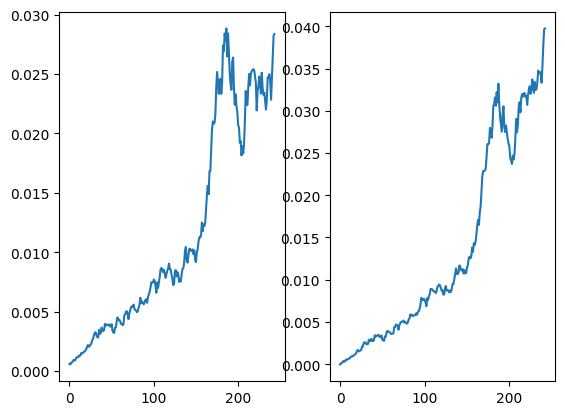

In [664]:
import matplotlib.pyplot as plt
# attr_logp_history_sum = np.sum(attr_logp_history, axis=-1)  # just entire
# attr_logp_history_sum = np.sum(np.array(attr_logp_history)[:,4:], axis=-1)
# attr_logp_history_sum = np.array(attr_logp_history)[:,-1]
plt.subplot(1,2,1)
# plt.plot(attr_logp_history_sum)
plt.plot(attr_prob_history)
plt.subplot(1,2,2)
plt.plot(np.cumsum(inner_prod_history))
# plt.plot(np.exp(attr_logp_history_sum))

In [593]:
# What is the data index that most largely increased the log prob?
attr_logp_history_sum_after = attr_logp_history_sum[1:]
# attr_logp_history_sum_prev = np.array(attr_logp_history_sum).copy()
attr_logp_history_sum_prev = np.array(attr_logp_history_sum)[:-1]
attr_logp_improve = attr_logp_history_sum_after - attr_logp_history_sum_prev
biggest_improve_iter_i = np.argsort(-attr_logp_improve)

In [836]:
biggest_improve_data_idx = []
for iter_i in biggest_improve_iter_i[:10]:
    print(f"Iteration #{iter_i}")
    title, idx = idx_history[iter_i][0]
    idx = idx.item()
    print(decode(data_token[title][idx:idx+block_size+1].astype(np.int64)))
    print("======")

Iteration #239
 particularly indoors. Transmission can also occur when people touch their eyes, nose or mouth after touching surfaces or objects that have been contaminated by the virus. People remain contagious for up to 20 days and can spread the virus even if they do not develop symptoms.
Testing methods for COVID-19 to detect the virus's nucleic acid include real-time reverse transcription polymerase chain reaction, transcription-mediated amplification, and reverse transcription loop-mediated isothermal amplification from a nasopharyngeal swab.
Several COVID-19 vaccines have been approved and distributed in various countries, which have initiated mass vaccination campaigns. Other preventive measures include physical
Iteration #84
 bat coronavirus samples (BatCov RaTG13). The structural proteins of SARS-CoV-2 include membrane glycoprotein (M), envelope protein (E), nucleocapsid protein (N), and the spike protein (S). The M protein of SARS-CoV-2 is about 98% similar to the M protein 

### Generate

In [838]:
start = "The symptoms of COVID-19 include headache"
start_ids = encode(start)
x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])

In [839]:
model.eval()
model.to(device)

with torch.no_grad():
    with ctx:
        for k in range(5):
            y = model.generate(x, 200, temperature=1, top_k=200)
            print(decode(y[0].tolist()))
            print("====")

The symptoms of COVID-19 include headache, nausea, vomiting, abdominal pain, abdominal pain for at least twenty-eight hours, and abdominal pain for at least twenty-one days. Blood vessel dysfunction, thrombosis, and venous thromboembolism occur in people COVID-19; venous thromboembolism occurs in people transferred to the ICU with pneumonia, and ischaemic events occur in the number of clinical infections seen with COVID-19. Infection may remain for hours or days, possibly leading to more severe symptoms. Infection may also remain for days, possibly leading to a first responder response that is faster response times than is possible with previous viral injury. Multi-year complications have occurred, with acute respiratory distress syndrome, systemic laminar filoviosis, and thromboembolism due to infections related to the infection, and subconjunctivitis, perforated lung, periorbital scar, and acute kidney injury due to tears
====
The symptoms of COVID-19 include headache, fatigue, fatig